In [92]:
import pandas as pd
from plotting import CandlePlot

In [93]:
df_ma_res = pd.read_pickle("../data/returned_ma_res.pkl")
df_ma_trades = pd.read_pickle("../data/returned_ma_trades.pkl")

In [94]:
df_ma_res

,pair,num_trades,total_gain,mean_gain,min_gain,max_gain,granularity,cross,ma_l,ma_s
0,EURGBP,3048,-1089,0,-145,543,H4,MA_10_MA_20,MA_20,MA_10
1,EURGBP,2670,-991,0,-135,523,H4,MA_10_MA_50,MA_50,MA_10
2,EURGBP,2004,176,0,-147,509,H4,MA_20_MA_50,MA_50,MA_20
3,EURGBP,2578,-1942,0,-135,514,H4,MA_10_MA_100,MA_100,MA_10
4,EURGBP,1940,-1964,-1,-148,484,H4,MA_20_MA_100,MA_100,MA_20
...,...,...,...,...,...,...,...,...,...,...
415,USDCAD,189,-3073,-16,-187,732,D1,MA_100_MA_200,MA_200,MA_100
416,USDCAD,485,-6479,-13,-233,844,D1,MA_10_MA_400,MA_400,MA_10
417,USDCAD,345,-5014,-14,-222,1103,D1,MA_20_MA_400,MA_400,MA_20
418,USDCAD,209,-4299,-20,-244,637,D1,MA_50_MA_400,MA_400,MA_50


In [95]:
df_ma_trades.tail()

,time,bid_o,bid_h,bid_l,bid_c,ask_o,ask_h,ask_l,ask_c,mid_o,...,DELTA_PREV,TRADE,mid_c_entry,mid_c_exit,trade_result,GAIN,granularity,pair,GAIN_C,cross
463279,2024-06-28,1.36996,1.37341,1.36551,1.36768,1.36999,1.37343,1.36554,1.36814,1.369975,...,0.000633,-1,1.367910,1.373845,-0.005935,-59.35,D1,USDCAD,-1482.05,MA_100_MA_400
463280,2024-07-01,1.36745,1.37488,1.36632,1.37383,1.36748,1.37489,1.36635,1.37386,1.367465,...,-0.002270,1,1.373845,1.367755,-0.006090,-60.90,D1,USDCAD,-1542.95,MA_100_MA_400
463281,2024-07-02,1.37383,1.37551,1.36672,1.36774,1.37386,1.37554,1.36676,1.36777,1.373845,...,0.004598,-1,1.367755,1.370410,-0.002655,-26.55,D1,USDCAD,-1569.50,MA_100_MA_400
463282,2024-07-18,1.36789,1.37182,1.36703,1.37038,1.36794,1.37188,1.36709,1.37044,1.367915,...,-0.001464,1,1.370410,1.373605,0.003195,31.95,D1,USDCAD,-1537.55,MA_100_MA_400
463283,2024-08-08,1.37519,1.37654,1.37262,1.37357,1.37523,1.37658,1.37266,1.37364,1.375210,...,0.000503,-1,1.373605,NaN,NaN,NaN,D1,USDCAD,NaN,MA_100_MA_400


In [96]:
df_ma_trades.shape

(463284, 31)

In [97]:
df_ma_trades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463284 entries, 0 to 463283
Data columns (total 31 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   time            463284 non-null  datetime64[ns]
 1   bid_o           463284 non-null  float64       
 2   bid_h           463284 non-null  float64       
 3   bid_l           463284 non-null  float64       
 4   bid_c           463284 non-null  float64       
 5   ask_o           463284 non-null  float64       
 6   ask_h           463284 non-null  float64       
 7   ask_l           463284 non-null  float64       
 8   ask_c           463284 non-null  float64       
 9   mid_o           463284 non-null  float64       
 10  mid_h           463284 non-null  float64       
 11  mid_l           463284 non-null  float64       
 12  mid_c           463284 non-null  float64       
 13  MA_100          463284 non-null  float64       
 14  MA_200          463284 non-null  flo

In [98]:
df_ma_res.granularity.unique()

array(['H4', 'D1'], dtype=object)

In [99]:
df_ma_res_h1 = df_ma_res[df_ma_res.granularity == 'D1'].copy()
df_ma_trades_h1 = df_ma_trades[df_ma_trades.granularity == 'D1'].copy()

In [100]:
df_ma_res_h1.columns

Index(['pair', 'num_trades', 'total_gain', 'mean_gain', 'min_gain', 'max_gain',
       'granularity', 'cross', 'ma_l', 'ma_s'],
      dtype='object')

In [101]:
df_ma_trades_h1

,time,bid_o,bid_h,bid_l,bid_c,ask_o,ask_h,ask_l,ask_c,mid_o,...,DELTA_PREV,TRADE,mid_c_entry,mid_c_exit,trade_result,GAIN,granularity,pair,GAIN_C,cross
387669,2016-01-14,0.75387,0.76068,0.75219,0.75381,0.75387,0.76068,0.75219,0.75381,0.753870,...,0.000000,-1,0.753810,0.765950,-0.012140,-121.40,D1,EURGBP,-121.40,MA_10_MA_20
387670,2016-01-15,0.75381,0.76943,0.75251,0.76595,0.75381,0.76943,0.75251,0.76595,0.753810,...,-0.007959,1,0.765950,0.756120,-0.009830,-98.30,D1,EURGBP,-219.70,MA_10_MA_20
387671,2016-01-22,0.76448,0.76521,0.75254,0.75612,0.76448,0.76521,0.75254,0.75612,0.764480,...,0.051158,-1,0.756120,0.761410,-0.005290,-52.90,D1,EURGBP,-272.60,MA_10_MA_20
387672,2016-01-25,0.75586,0.76180,0.75523,0.76141,0.75586,0.76180,0.75523,0.76141,0.755860,...,-0.115398,1,0.761410,0.772340,0.010930,109.30,D1,EURGBP,-163.30,MA_10_MA_20
387673,2016-02-20,0.77505,0.77537,0.77231,0.77234,0.77505,0.77537,0.77231,0.77234,0.775050,...,0.032548,-1,0.772340,0.779240,-0.006900,-69.00,D1,EURGBP,-232.30,MA_10_MA_20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
463279,2024-06-28,1.36996,1.37341,1.36551,1.36768,1.36999,1.37343,1.36554,1.36814,1.369975,...,0.000633,-1,1.367910,1.373845,-0.005935,-59.35,D1,USDCAD,-1482.05,MA_100_MA_400
463280,2024-07-01,1.36745,1.37488,1.36632,1.37383,1.36748,1.37489,1.36635,1.37386,1.367465,...,-0.002270,1,1.373845,1.367755,-0.006090,-60.90,D1,USDCAD,-1542.95,MA_100_MA_400
463281,2024-07-02,1.37383,1.37551,1.36672,1.36774,1.37386,1.37554,1.36676,1.36777,1.373845,...,0.004598,-1,1.367755,1.370410,-0.002655,-26.55,D1,USDCAD,-1569.50,MA_100_MA_400
463282,2024-07-18,1.36789,1.37182,1.36703,1.37038,1.36794,1.37188,1.36709,1.37044,1.367915,...,-0.001464,1,1.370410,1.373605,0.003195,31.95,D1,USDCAD,-1537.55,MA_100_MA_400


In [102]:
df_cross_summary = df_ma_res_h1[['pair', 'num_trades', 'total_gain', 'cross']].copy()

In [103]:
df_cross_summary

,pair,num_trades,total_gain,cross
210,EURGBP,598,312,MA_10_MA_20
211,EURGBP,536,-1025,MA_10_MA_50
212,EURGBP,426,-2286,MA_20_MA_50
213,EURGBP,524,-1227,MA_10_MA_100
214,EURGBP,422,-3317,MA_20_MA_100
...,...,...,...,...
415,USDCAD,189,-3073,MA_100_MA_200
416,USDCAD,485,-6479,MA_10_MA_400
417,USDCAD,345,-5014,MA_20_MA_400
418,USDCAD,209,-4299,MA_50_MA_400


In [104]:
df_cross_gr = df_cross_summary.groupby(by="cross").sum(numeric_only=True)
df_cross_gr.sort_values(by="total_gain", ascending=False, inplace=True)

In [105]:
df_cross_gr

,num_trades,total_gain
cross,,
MA_10_MA_20,8738,2460
MA_10_MA_50,7772,-7929
MA_20_MA_50,6007,-9773
MA_10_MA_100,7512,-9948
MA_10_MA_400,6920,-16667
MA_10_MA_200,7212,-18705
MA_20_MA_200,5231,-22102
MA_100_MA_200,2770,-26079
MA_20_MA_100,5669,-28184


In [106]:
total_pairs = len(df_ma_res_h1.pair.unique())
total_pairs

15

In [107]:
temp = df_ma_res_h1[df_ma_res_h1.cross == 'MA_10_MA_20']

In [108]:
temp

,pair,num_trades,total_gain,mean_gain,min_gain,max_gain,granularity,cross,ma_l,ma_s
210,EURGBP,598,312,0,-222,492,D1,MA_10_MA_20,MA_20,MA_10
224,EURJPY,539,3968,7,-522,1228,D1,MA_10_MA_20,MA_20,MA_10
238,EURCAD,618,-4265,-6,-315,988,D1,MA_10_MA_20,MA_20,MA_10
252,EURAUD,594,-1481,-2,-358,1463,D1,MA_10_MA_20,MA_20,MA_10
266,EURUSD,562,534,0,-210,515,D1,MA_10_MA_20,MA_20,MA_10
280,GBPJPY,501,10845,21,-1303,1632,D1,MA_10_MA_20,MA_20,MA_10
294,GBPCAD,578,-1894,-3,-822,1004,D1,MA_10_MA_20,MA_20,MA_10
308,GBPAUD,610,-6981,-11,-1173,1575,D1,MA_10_MA_20,MA_20,MA_10
322,GBPUSD,562,2176,3,-725,1115,D1,MA_10_MA_20,MA_20,MA_10
336,CADJPY,581,2109,3,-350,980,D1,MA_10_MA_20,MA_20,MA_10


In [109]:
temp[temp.total_gain > 0].shape

(8, 10)

In [110]:
for c in df_ma_res_h1.cross.unique():
    temp = df_ma_res_h1[df_ma_res_h1.cross == c]
    pg = temp[temp.total_gain > 0].shape[0]

    print(f"{c} pg:{pg} perc gain:{(pg / total_pairs) * 100:.0f}%")

MA_10_MA_20 pg:8 perc gain:53%
MA_10_MA_50 pg:6 perc gain:40%
MA_20_MA_50 pg:4 perc gain:27%
MA_10_MA_100 pg:5 perc gain:33%
MA_20_MA_100 pg:4 perc gain:27%
MA_50_MA_100 pg:3 perc gain:20%
MA_10_MA_200 pg:3 perc gain:20%
MA_20_MA_200 pg:4 perc gain:27%
MA_50_MA_200 pg:2 perc gain:13%
MA_100_MA_200 pg:4 perc gain:27%
MA_10_MA_400 pg:5 perc gain:33%
MA_20_MA_400 pg:4 perc gain:27%
MA_50_MA_400 pg:0 perc gain:0%
MA_100_MA_400 pg:3 perc gain:20%


In [111]:
cross = "MA_10_MA_20"
df_MA_20_MA_50 = df_ma_res_h1[df_ma_res_h1.cross == cross].copy()
df_MA_20_MA_50.sort_values(by="total_gain", ascending=False, inplace=True)

In [112]:
df_MA_20_MA_50

,pair,num_trades,total_gain,mean_gain,min_gain,max_gain,granularity,cross,ma_l,ma_s
280,GBPJPY,501,10845,21,-1303,1632,D1,MA_10_MA_20,MA_20,MA_10
224,EURJPY,539,3968,7,-522,1228,D1,MA_10_MA_20,MA_20,MA_10
392,USDJPY,521,2817,5,-585,1507,D1,MA_10_MA_20,MA_20,MA_10
350,AUDJPY,601,2256,3,-363,1180,D1,MA_10_MA_20,MA_20,MA_10
322,GBPUSD,562,2176,3,-725,1115,D1,MA_10_MA_20,MA_20,MA_10
336,CADJPY,581,2109,3,-350,980,D1,MA_10_MA_20,MA_20,MA_10
266,EURUSD,562,534,0,-210,515,D1,MA_10_MA_20,MA_20,MA_10
210,EURGBP,598,312,0,-222,492,D1,MA_10_MA_20,MA_20,MA_10
252,EURAUD,594,-1481,-2,-358,1463,D1,MA_10_MA_20,MA_20,MA_10
294,GBPCAD,578,-1894,-3,-822,1004,D1,MA_10_MA_20,MA_20,MA_10


In [113]:
df_gains = df_ma_trades_h1[(df_ma_trades_h1.cross==cross)&(df_ma_trades_h1.pair=='GBPJPY')].copy()

In [114]:
df_gains.head()

,time,bid_o,bid_h,bid_l,bid_c,ask_o,ask_h,ask_l,ask_c,mid_o,...,DELTA_PREV,TRADE,mid_c_entry,mid_c_exit,trade_result,GAIN,granularity,pair,GAIN_C,cross
413419,2016-01-15,170.088,170.567,166.244,166.781,170.088,170.567,166.244,166.781,170.088,...,0.000000,-1,166.781,158.974,7.807,780.7,D1,GBPJPY,780.7,MA_10_MA_20
413420,2016-03-01,156.649,159.523,156.147,158.974,156.649,159.523,156.147,158.974,156.649,...,-0.144278,1,158.974,160.056,1.082,108.2,D1,GBPJPY,888.9,MA_10_MA_20
413421,2016-03-08,161.752,161.865,159.590,160.056,161.752,161.865,159.590,160.056,161.752,...,0.103278,-1,160.056,161.115,-1.059,-105.9,D1,GBPJPY,783.0,MA_10_MA_20
413422,2016-03-09,160.062,161.353,159.477,161.115,160.062,161.353,159.477,161.115,160.062,...,-0.013429,1,161.115,160.069,-1.046,-104.6,D1,GBPJPY,678.4,MA_10_MA_20
413423,2016-03-15,162.759,162.932,159.558,160.069,162.759,162.932,159.558,160.069,162.759,...,0.064848,-1,160.069,161.489,-1.420,-142.0,D1,GBPJPY,536.4,MA_10_MA_20


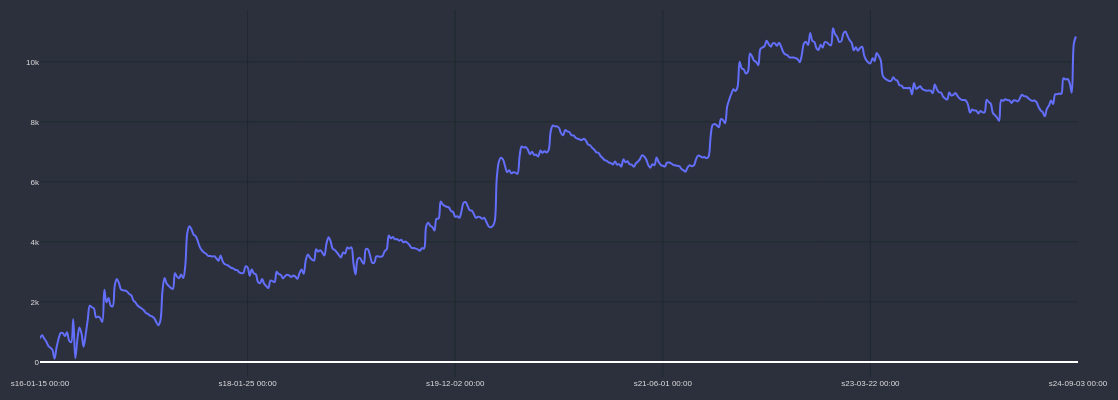

In [115]:
cp = CandlePlot(df_gains, candles=False)
cp.show_plot(line_traces = ['GAIN_C'])

GBPJPY 10845.199999999935


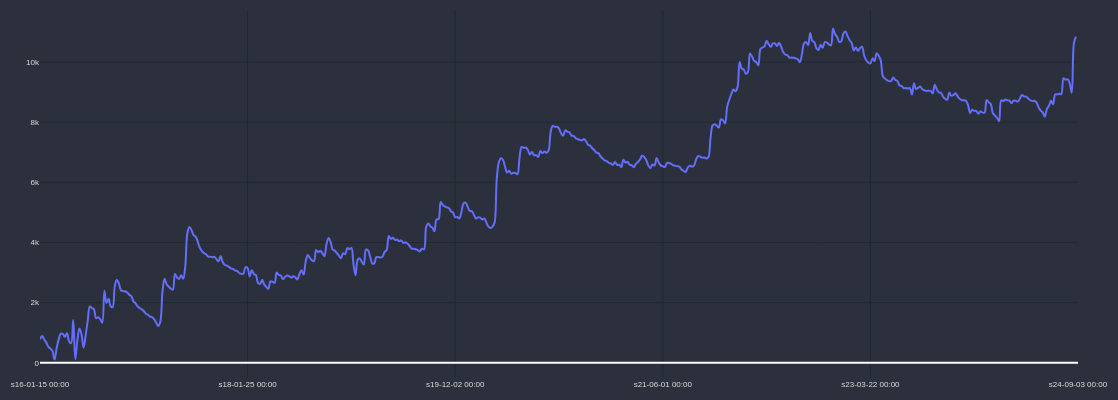

EURJPY 3968.1000000000745


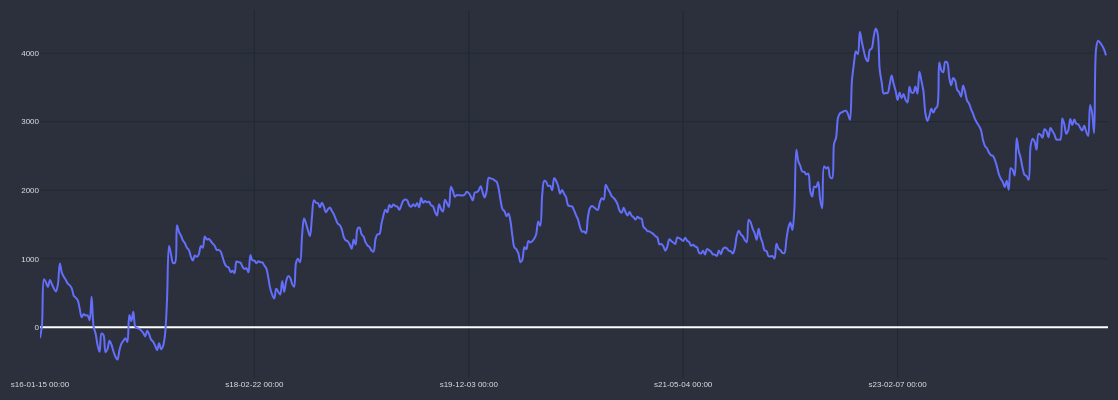

USDJPY 2817.999999999999


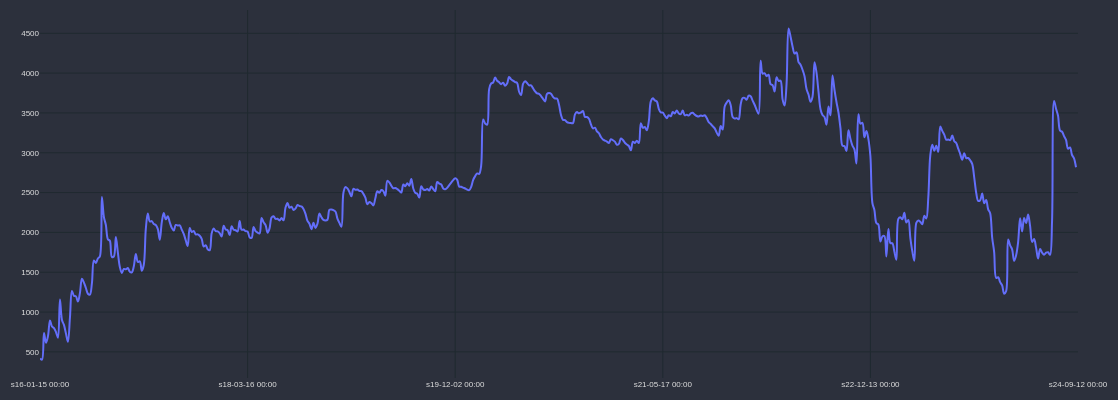

AUDJPY 2256.899999999956


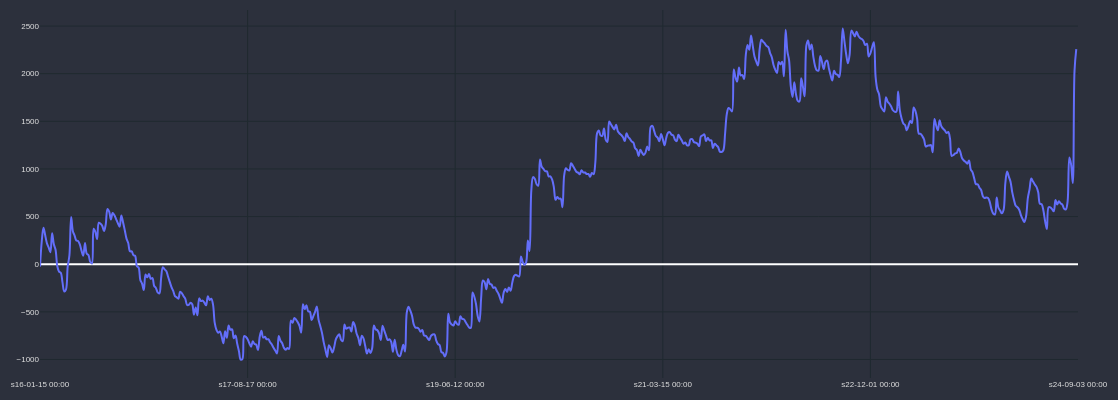

GBPUSD 2176.9000000000033


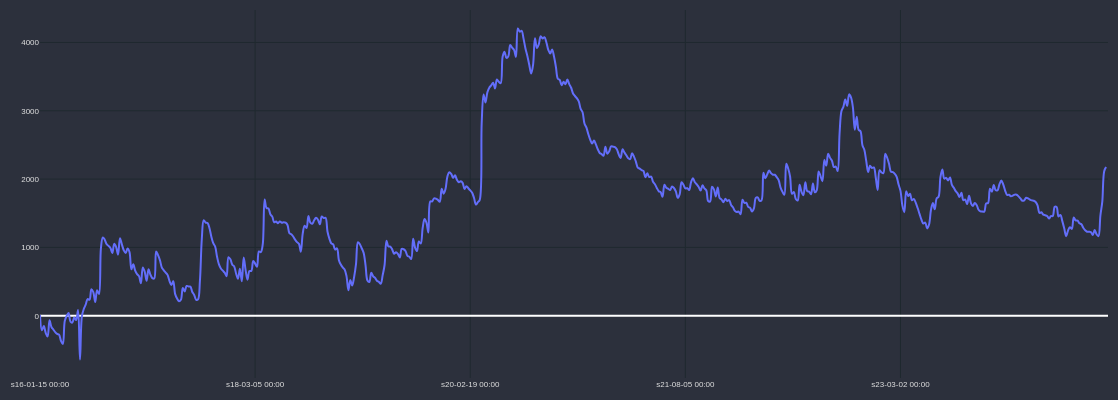

CADJPY 2109.2999999999556


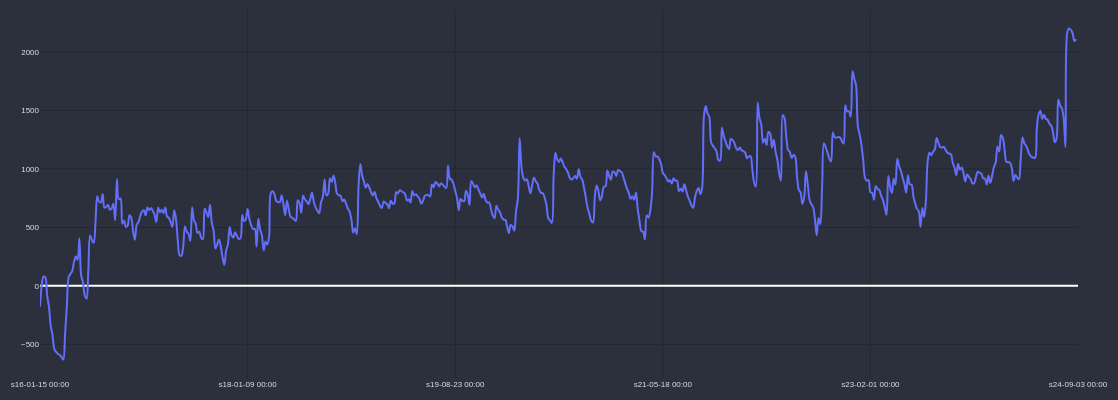

EURUSD 534.099999999982


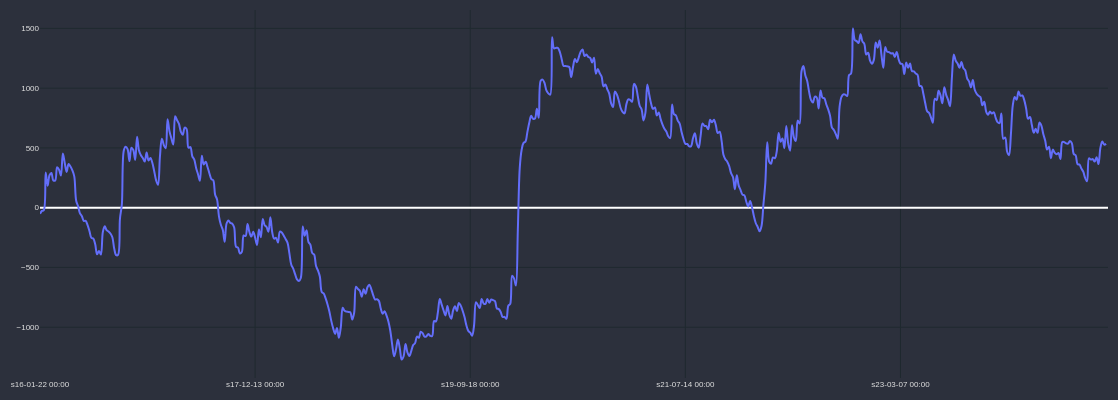

EURGBP 312.7500000000514


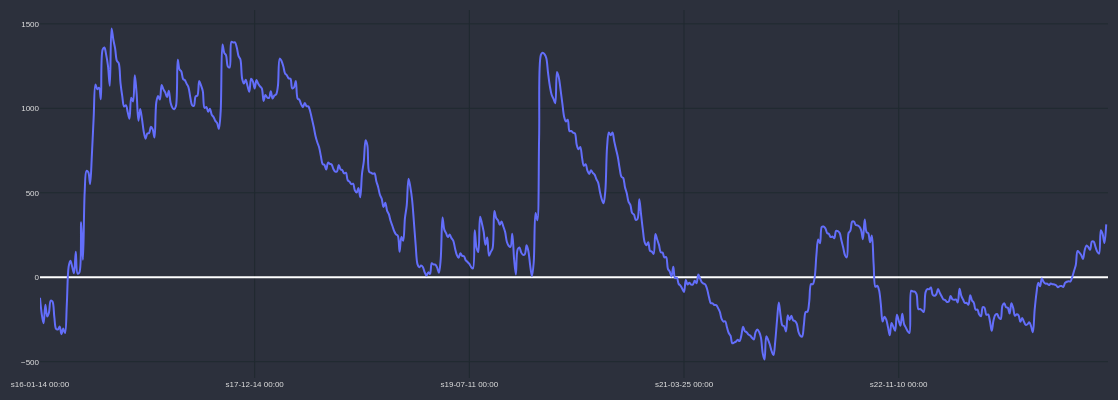

In [116]:
for curr in df_MA_20_MA_50[df_MA_20_MA_50.total_gain > 0].pair.unique():
    temp_gains = df_ma_trades_h1[(df_ma_trades_h1.cross==cross)&(df_ma_trades_h1.pair==curr)].copy()
    print(curr, temp_gains.GAIN.sum())
    cp=CandlePlot(temp_gains, candles=False)
    cp.show_plot(line_traces=['GAIN_C'])